<a href="https://colab.research.google.com/github/nmaiya/ColabTimeSeries/blob/main/SARIMAX_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline


In [2]:
resResutls = pd.read_csv('/content/RestaurantVisitors.csv',index_col='date',parse_dates=True)

In [3]:
resResutls.index.freq='D'

In [4]:
resResutls.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [5]:
 resResutls.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [6]:
resResutls= resResutls.dropna()

In [7]:
resResutls.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [8]:
cols=['rest1', 'rest2', 'rest3','rest4', 'total']

In [9]:
for columns in cols:
  resResutls[columns]=resResutls[columns].astype(int)

<ipython-input-9-8b86ecc073e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resResutls[columns]=resResutls[columns].astype(int)
<ipython-input-9-8b86ecc073e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resResutls[columns]=resResutls[columns].astype(int)
<ipython-input-9-8b86ecc073e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [10]:
resResutls.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 478 entries, 2016-01-01 to 2017-04-22
Freq: D
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   weekday       478 non-null    object
 1   holiday       478 non-null    int64 
 2   holiday_name  478 non-null    object
 3   rest1         478 non-null    int64 
 4   rest2         478 non-null    int64 
 5   rest3         478 non-null    int64 
 6   rest4         478 non-null    int64 
 7   total         478 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 33.6+ KB


<Axes: xlabel='date'>

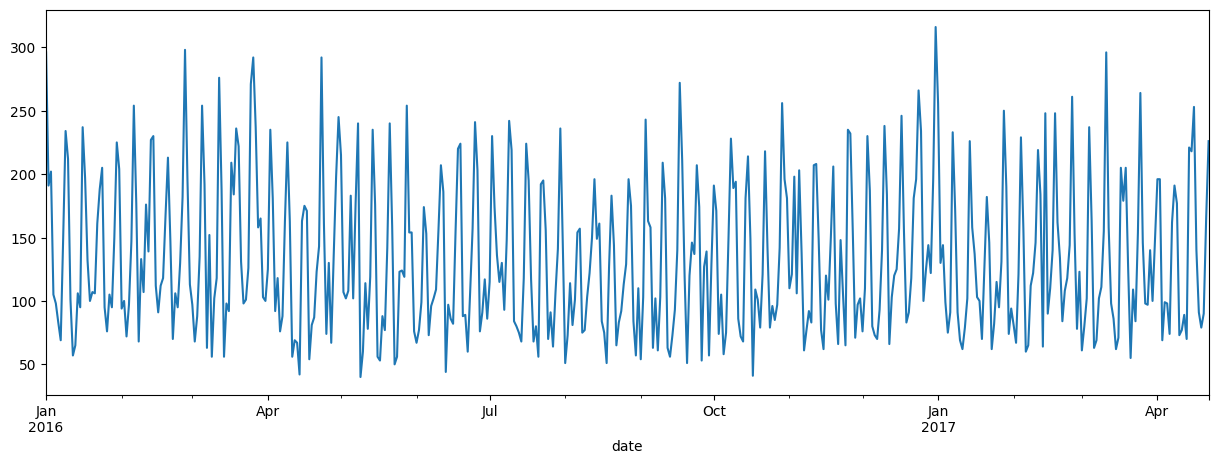

In [11]:
resResutls['total'].plot(figsize=(15,5))

<Axes: xlabel='date'>

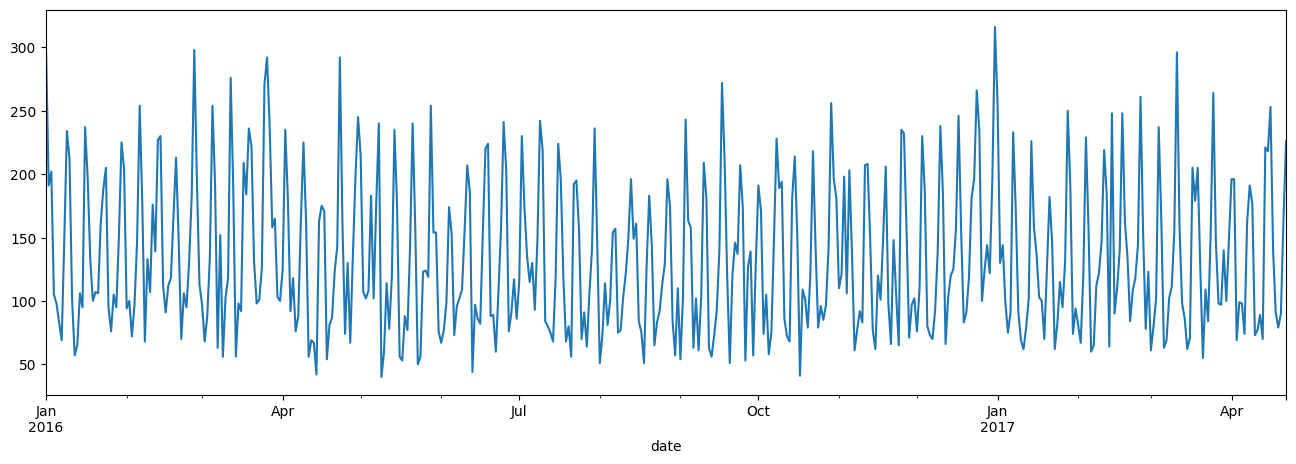

In [15]:
resResutls['total'].plot(figsize=(16,5))

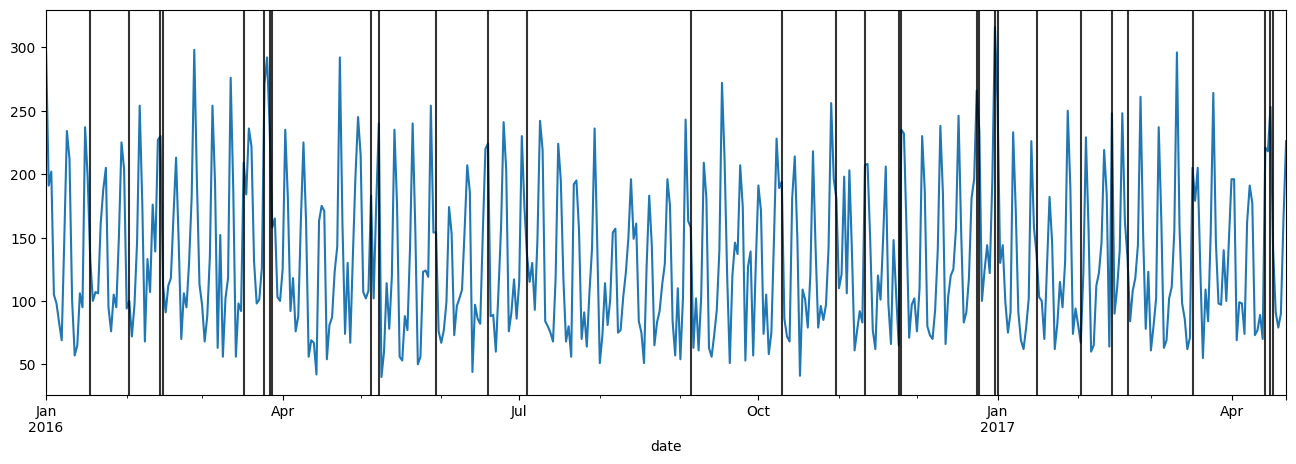

In [19]:
ax=resResutls['total'].plot(figsize=(16,5))
for day in resResutls[resResutls['holiday']==1].index:
  ax.axvline(x=day,color='black',alpha=0.8);

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

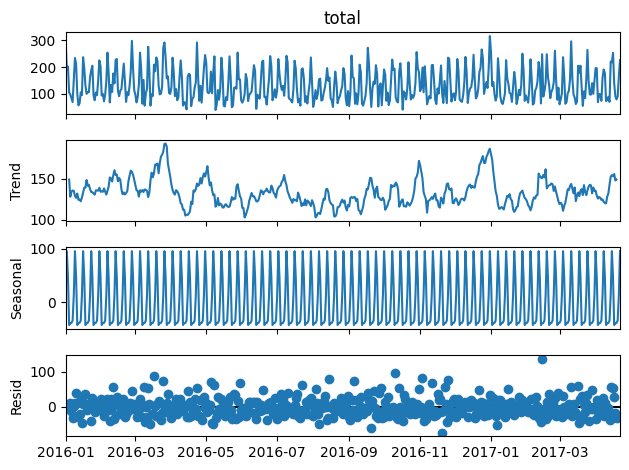

In [21]:
resutls=seasonal_decompose(resResutls['total'])
resutls.plot();

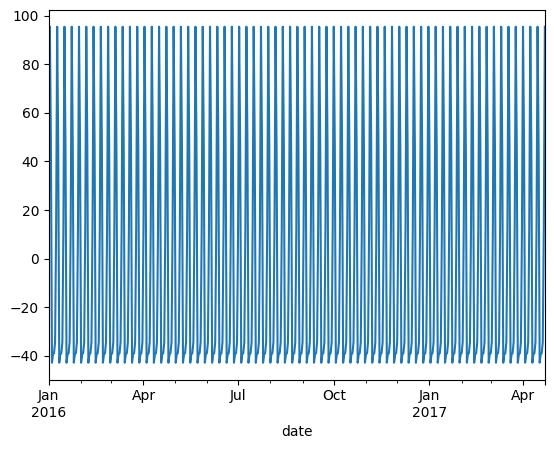

In [22]:
resutls.seasonal.plot();

In [23]:
len(resResutls)

478

In [25]:
train=resResutls.iloc[:436]
test=resResutls.iloc[436:]

In [26]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.1 MB/s eta 0:00:00


In [27]:
from pmdarima import auto_arima

In [28]:
auto_arima(train['total'],seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2169.093
Date:                   Mon, 22 Jul 2024   AIC                           4346.187
Time:                           20:34:34   BIC                           4362.498
Sample:                       01-01-2016   HQIC                          4352.624
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8012      1.290      2.171      0.030       0.272       5.330
ar.S.L7        0.9806      0.009    111.064      0.000       0.963       0.998
ma.S.L7       -0.8050      0.046    -17.500      0.000      -0.895      -0.715
sigma2      1226.9393     73.379     16.721      0.000    1083.120    1370.759
===================================================================================
Ljung-Box (L1) (Q):                  18.33   Jarque-Bera (JB):                66.19
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                             0.76
Prob(H) (two-sided):                  0.55   Kurtosis:                         4.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [30]:
model=SARIMAX(train['total'],order=(1,1,1),seasonal_order=(1,1,1,7),enforce_invertibility=False)

In [31]:
resutl=model.fit()

In [32]:
resutl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -2110.956
Date:                           Mon, 22 Jul 2024   AIC                           4231.911
Time:                                   20:41:54   BIC                           4252.207
Sample:                               01-01-2016   HQIC                          4239.927
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1714      0.050      3.446      0.001       0.074       0.269
ma.L1         -0.9701      0.015    -65.492      0.000      -0.999      -0.941
ar.S.L7       -0.0071      0.059     -0.120      0.904      -0.123       0.109
ma.S.L7       -0.9561      0.026    -36.153      0.000      -1.008      -0.904
sigma2      1067.9236     53.463     19.975      0.000     963.139    1172.709
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               106.33
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                             0.85
Prob(H) (two-sided):                  0.58   Kurtosis:                         4.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
start=len(train)
end=len(train)+len(test)-1

In [34]:
pred=resutl.predict(start=start,end=end).rename('SARIMA')

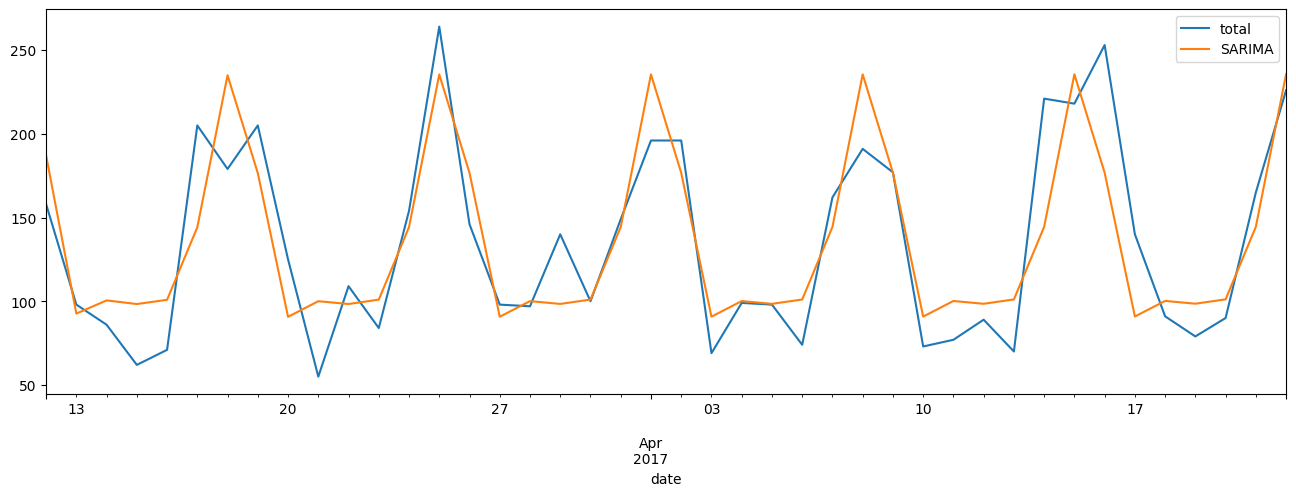

In [35]:
test['total'].plot(figsize=(16,5),legend=True)
pred.plot(legend=True);

In [36]:
from statsmodels.tools.eval_measures import rmse

In [37]:
rmse(test['total'],pred)

31.262003211444622

In [38]:
test['total'].mean()

134.26190476190476